# Pandas

The main pandas data structure is the DataFrame, which you can think of as representing a table or spreadsheet of data. Creating a DataFrame from the original set of records is simple

In [1]:
%matplotlib inline
# import pandas as pd

In [2]:
names1880 = pd.read_csv('data/names/yob1880.txt', names=['name', 'sex', 'births'])

In [3]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
df =  pd.DataFrame(columns=['name', 'sex'])

y1, y2 = 1880, 2016

years = [str(y) for y in range(y1, y2 + 1)]

for year in range(y1, y2 + 1 ):
    temp = pd.read_csv('data/names/yob{}.txt'.format(year), names=['name', 'sex', str(year)])
    df = pd.merge(df, temp, left_on=['name', 'sex'], right_on=['name', 'sex'], how='outer')

In [5]:
print(years)

['1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',

In [6]:
df['total'] = df[years].sum(axis=1)
df = df.sort_values(by='total', ascending=False)
df.head()

,name,sex,1880,1881,1882,1883,1884,1885,1886,1887,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
944,James,M,5927.0,5441.0,5892.0,5223.0,5693.0,5175.0,5355.0,4768.0,...,15165.0,14194.0,13870.0,13239.0,13404.0,13540.0,14403.0,14773.0,14776.0,5136026.0
942,John,M,9655.0,8769.0,9557.0,8894.0,9388.0,8756.0,9026.0,8110.0,...,13313.0,12109.0,11550.0,11033.0,10611.0,10695.0,10675.0,10360.0,9952.0,5105834.0
951,Robert,M,2415.0,2140.0,2500.0,2334.0,2468.0,2322.0,2443.0,2125.0,...,8822.0,7818.0,7547.0,6964.0,6941.0,6698.0,6623.0,6100.0,5953.0,4809176.0
987,Michael,M,354.0,298.0,321.0,307.0,373.0,370.0,348.0,345.0,...,20609.0,18927.0,17336.0,16775.0,16143.0,15468.0,15426.0,14396.0,13998.0,4338144.0
0,Mary,F,7065.0,6919.0,8148.0,8012.0,9217.0,9128.0,9889.0,9888.0,...,3494.0,3158.0,2863.0,2705.0,2569.0,2644.0,2629.0,2620.0,2487.0,4120692.0


In [7]:
df.loc[df.total.idxmax()].head(10)

name     James
sex          M
1880    5927.0
1881    5441.0
1882    5892.0
1883    5223.0
1884    5693.0
1885    5175.0
1886    5355.0
1887    4768.0
Name: 944, dtype: object

In [8]:
df.total.max()

5136026.0

In [9]:

sorted_by_total_df = df.set_index('name').iloc[0:5].loc[:, '1880':'2016']
sorted_by_total_df

,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,,,,,,,,,,,,,,,,,,,,,
James,5927.0,5441.0,5892.0,5223.0,5693.0,5175.0,5355.0,4768.0,5562.0,5020.0,...,15951.0,15165.0,14194.0,13870.0,13239.0,13404.0,13540.0,14403.0,14773.0,14776.0
John,9655.0,8769.0,9557.0,8894.0,9388.0,8756.0,9026.0,8110.0,9247.0,8548.0,...,14428.0,13313.0,12109.0,11550.0,11033.0,10611.0,10695.0,10675.0,10360.0,9952.0
Robert,2415.0,2140.0,2500.0,2334.0,2468.0,2322.0,2443.0,2125.0,2814.0,2513.0,...,9371.0,8822.0,7818.0,7547.0,6964.0,6941.0,6698.0,6623.0,6100.0,5953.0
Michael,354.0,298.0,321.0,307.0,373.0,370.0,348.0,345.0,466.0,377.0,...,21979.0,20609.0,18927.0,17336.0,16775.0,16143.0,15468.0,15426.0,14396.0,13998.0
Mary,7065.0,6919.0,8148.0,8012.0,9217.0,9128.0,9889.0,9888.0,11754.0,11648.0,...,3677.0,3494.0,3158.0,2863.0,2705.0,2569.0,2644.0,2629.0,2620.0,2487.0


<AxesSubplot:>

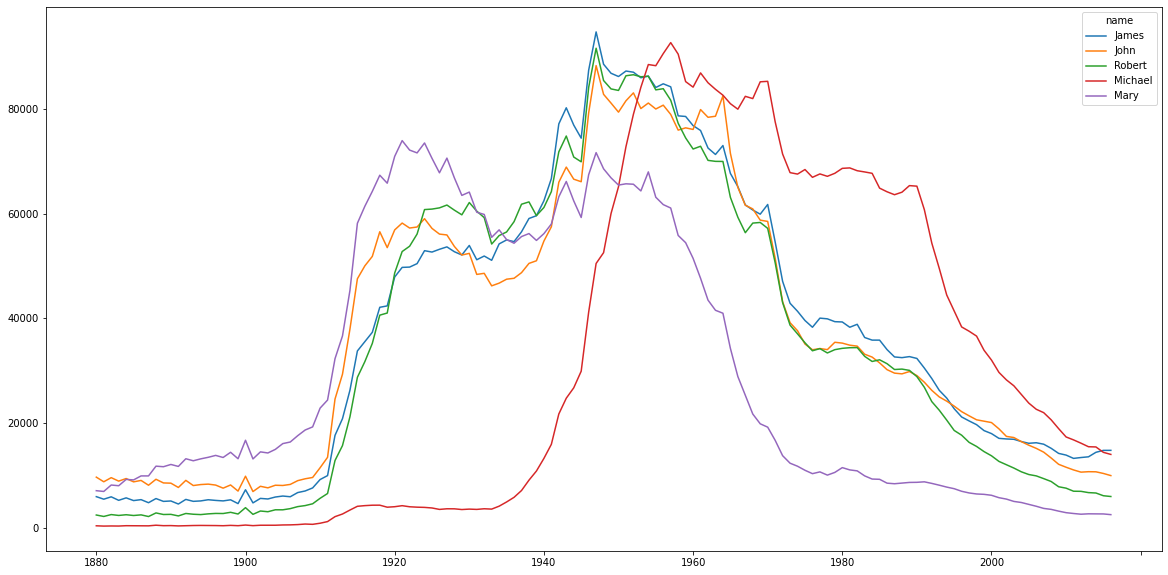

In [10]:
sorted_by_total_df.T.plot(figsize=(20,10))

In [11]:
df.set_index('name').loc[:, '1880':'2016'].sort_values(by='2016', ascending=False).head(10)

,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,,,,,,,,,,,,,,,,,,,,,
Emma,2003.0,2034.0,2303.0,2367.0,2587.0,2728.0,2764.0,2647.0,3087.0,2884.0,...,18365.0,18806.0,17889.0,17333.0,18791.0,20922.0,20921.0,20912.0,20415.0,19414.0
Olivia,44.0,51.0,52.0,46.0,54.0,59.0,72.0,69.0,71.0,100.0,...,16577.0,17076.0,17429.0,17019.0,17315.0,17303.0,18405.0,19784.0,19638.0,19246.0
Noah,103.0,81.0,108.0,81.0,94.0,76.0,90.0,94.0,83.0,85.0,...,16588.0,15781.0,17236.0,16442.0,16848.0,17336.0,18224.0,19263.0,19594.0,19015.0
Liam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5136.0,5977.0,8562.0,10927.0,13432.0,16789.0,18121.0,18440.0,18330.0,18138.0
Ava,13.0,18.0,21.0,29.0,32.0,18.0,27.0,36.0,41.0,44.0,...,18046.0,17033.0,15864.0,15424.0,15491.0,15523.0,15236.0,15680.0,16340.0,16237.0
Sophia,138.0,122.0,179.0,159.0,170.0,185.0,218.0,192.0,251.0,251.0,...,17020.0,16078.0,16934.0,20634.0,21833.0,22292.0,21193.0,18583.0,17381.0,16070.0
William,9532.0,8524.0,9298.0,8387.0,8897.0,8044.0,8252.0,7470.0,8705.0,7772.0,...,18880.0,18386.0,17908.0,17042.0,17331.0,16872.0,16612.0,16798.0,15863.0,15668.0
Mason,22.0,13.0,12.0,12.0,14.0,15.0,18.0,13.0,14.0,21.0,...,10764.0,10477.0,10682.0,14837.0,19503.0,18961.0,17680.0,17177.0,16591.0,15192.0
James,5927.0,5441.0,5892.0,5223.0,5693.0,5175.0,5355.0,4768.0,5562.0,5020.0,...,15951.0,15165.0,14194.0,13870.0,13239.0,13404.0,13540.0,14403.0,14773.0,14776.0


<AxesSubplot:>

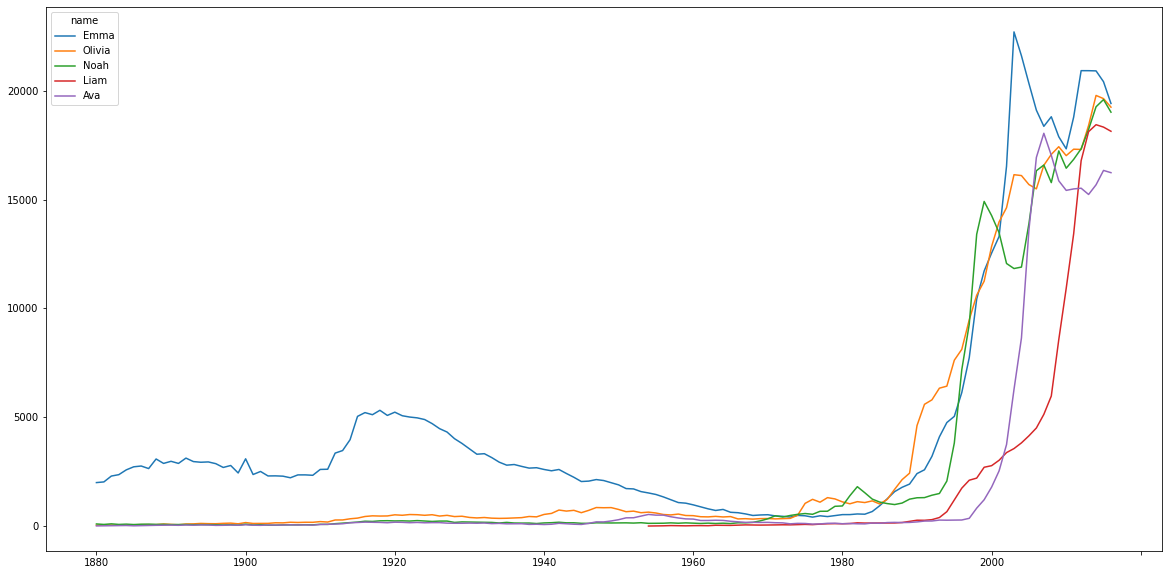

In [12]:
df.set_index('name').loc[:, '1880':'2016'].sort_values(by='2016', ascending=False).head().T.plot(figsize=(20,10))